In [27]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

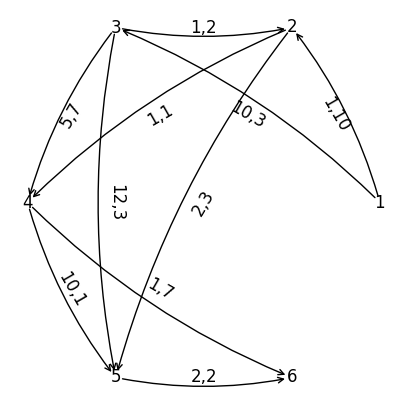

In [2]:
# dolocis podatke: graf, cene, kapacitete, povpraševanja
edges = [(1,2),(1,3),(3,2),(2,4),(2,5),(3,4),(3,5),(4,5),(4,6),(5,6)]
c = [1,10,1,1,2,5,12,10,1,2]
cap = [10,3,2,1,3,7,3,1,7,2]
H = [[1,3,2],
     [0,0,0],
     [0,0,0],
     [-1,0,0],
     [0,-3,0],
     [0,0,-2]
     ]

c_dict = dict(zip(edges, c))
cap_dict = dict(zip(edges, cap))

# konstruiraš graf iz podatkov
graph = nx.DiGraph()
graph.add_edges_from(edges)



nx.set_edge_attributes(graph, c_dict,"c")
nx.set_edge_attributes(graph, cap_dict,"cap")


hf.plot_multigraph(graph,with_labels=True,font_size=12,figure_size=(5,5))

# razberem dimenzije
n = len(graph.nodes()) # 6 # |V|
m = len(graph.edges()) # 10 # |E|
t = len(H[0]) # 3
# mt = m * t # 30
# nt = n * t # 18

In [3]:
# # spremenljivke
# X = cp.Variable((m,t),integer=False)

# # parametri
# c = cp.Parameter(m)
# cap = cp.Parameter(m)
# B = cp.Parameter((n,m))
# H = cp.Parameter((n,t))

# # dolocim vrednosti parametrom
# c.value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
# cap.value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])
# print(c)
# print(cap)
# B.value = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
# H.value = np.array([[1, 3, 2],
#                     [0, 0, 0],
#                     [0, 0, 0],
#                     [-1, 0, 0],
#                     [0, -3, 0],
#                     [0, 0, -2]
#                     ])

# # kriterijska funkcija
# obj = cp.Minimize(c.T @ cp.sum(X,axis=1))

# # omejitve
# constraints = [
#     cp.sum(X,axis=1) <= cap,
#     B @ X == H,
#     X >= 0      
# ]

# prob = cp.Problem(obj, constraints)

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", X.value)

# # resimo pri drugačnih parametrih
# # c.value = [1 for _,_, data in graph.edges(data=True)]

# # prob.solve()
# # print("status:", prob.status)
# # print("optimal value", prob.value)
# # print("optimal var", X.value)

In [5]:
# # spremenljivke
# x = cp.Variable(mt,integer=True)

# # parametri
# c = cp.Parameter(m)
# cap = cp.Parameter(m)
# B_ = cp.Parameter((nt,mt))
# h = cp.Parameter(nt)
# M = cp.Parameter((m,mt))
# lam = cp.Parameter(m)

# # dolocim vrednosti parametrom
# c.value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
# cap.value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])

# B = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
# B_.value = np.tile(B,(t,t))
# h.value = np.array([[1, 3, 2],
#                     [0, 0, 0],
#                     [0, 0, 0],
#                     [-1, 0, 0],
#                     [0, -3, 0],
#                     [0, 0, -2]
#                     ]).flatten(order="F")
# M.value = np.tile(np.eye(m),(1,t))
# lam.value = np.ones(m)
# # kriterijska funkcija
# obj = cp.Maximize(-c.T @ M @ x + lam @ (cap - M @ x))

# # omejitve
# constraints = [
#     B_ @ x == h,
#     x >= 0 
# ]

# prob = cp.Problem(obj, constraints)

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", x.value)

In [98]:
# # vp = {"X":X,"c":c,"cap":cap,"B":B,"H":H,"lam":lam}
# vp = {}
# # spremenljivke
# vp["X"] = cp.Variable((m,t),integer=True)

# # parametri
# vp["c"] = cp.Parameter(m, integer=True)
# vp["cap"] = cp.Parameter(m, integer = True)
# vp["B"] = cp.Parameter((n,m), integer = True)
# vp["H"] = cp.Parameter((n,t), integer= True)
# vp["lam"] = cp.Parameter(m, nonneg=True)

# # dolocim vrednosti parametrom
# vp["c"].value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
# vp["cap"].value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])
# print(c)
# print(cap)
# vp["B"].value = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
# vp["H"].value = np.array([[1, 3, 2],
#                     [0, 0, 0],
#                     [0, 0, 0],
#                     [-1, 0, 0],
#                     [0, -3, 0],
#                     [0, 0, -2]
#                     ])
# vp["lam"].value = np.zeros(m)



# # kriterijska funkcija
# obj = cp.Minimize(vp["c"].T @ cp.sum(vp["X"],axis=1) + vp["lam"] @ (cp.sum(vp["X"],axis=1) - vp["cap"]))

# # omejitve
# constraints = [
#     vp["B"] @ vp["X"] == vp["H"],
#     vp["X"] >= 0   
# ]

# prob = cp.Problem(obj, constraints)
# print(prob.is_dpp())

# prob.solve()
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", vp["X"].value)


# # resimo pri drugačnih parametrih
# # c.value = [1 for _,_, data in graph.edges(data=True)]

# # prob.solve()
# # print("status:", prob.status)
# # print("optimal value", prob.value)
# # print("optimal var", X.value)

In [3]:
# def init_from_graph(graph,demands): # TODO caps floor to int, costs fractional to int najmanjši skupni večkratnik imenovalcev
#     # razberem dimenzije
#     n = len(graph.nodes()) # 6 # |V|
#     m = len(graph.edges()) # 10 # |E|
#     t = len(H[0]) # 3
    
#     vp = {} # slovar spremenljivk in parametrov
    
#     # spremenljivke
#     vp["X"] = cp.Variable((m,t),integer=True)

#     # parametri
#     vp["c"] = cp.Parameter(m, integer=True)
#     vp["cap"] = cp.Parameter(m, integer = True)
#     vp["B"] = cp.Parameter((n,m), integer = True)
#     vp["H"] = cp.Parameter((n,t), integer= True)
#     vp["lam"] = cp.Parameter(m, nonneg=True)

#     # dolocim vrednosti parametrom
#     vp["c"].value = np.array([data["c"] for _,_, data in graph.edges(data=True)])
#     vp["cap"].value = np.array([data["cap"] for _,_, data in graph.edges(data=True)])
#     print(c)
#     print(cap)
#     vp["B"].value = -1 * np.array(nx.incidence_matrix(graph,oriented=True).todense())
#     def demands_to_matrix(demands,n):
#         H = np.zeros((n,len(demands)))
#         for k,(Ok,Dk,d) in enumerate(demands):
#             H[Ok,k] = d
#             H[Dk,k] = -d
#         return H      
#     # vp["H"].value = np.array([[1, 3, 2],
#     #                     [0, 0, 0],
#     #                     [0, 0, 0],
#     #                     [-1, 0, 0],
#     #                     [0, -3, 0],
#     #                     [0, 0, -2]
#     #                     ])
#     vp["H"].value = demands_to_matrix(demands,n)
#     print(vp["H"].value)
#     vp["lam"].value = np.zeros(m)



#     # kriterijska funkcija
#     obj = cp.Minimize(vp["c"].T @ cp.sum(vp["X"],axis=1) + vp["lam"] @ (cp.sum(vp["X"],axis=1) - vp["cap"]))

#     # omejitve
#     constraints = [
#         vp["B"] @ vp["X"] == vp["H"],
#         vp["X"] >= 0   
#     ]

#     # prob = cp.Problem(obj, constraints)
#     # # print(prob.is_dpp()) TODO
#     return (obj, constraints, vp)
    

In [61]:
# class Node:
#     EPSI = 10e-11
#     label = 0
#     def __init__(self, obj, constraints, vp, level = 0, parent = None, branchingTF = None):
#         self.problem = cp.Problem(obj, constraints)
#         self.vp = vp
#         self.sol = None
#         self.children = None
        
#         self.level = level
#         self.label = Node.label
#         Node.label += 1
        
#         self.parent = parent
        
#         # self.branches = branches
#         self.branchingTF = branchingTF
    
        
    
#     def solve(self,UB):
#         sol = {"zLD":-np.inf,"status":None,"X":None,"lam":None}
#         no_change_counter = 0
#         betha = 2
#         # self.vp["lam"].value = np.zeros(self.vp["lam"].value.shape)
        
#         tt_init = 100 # pomenbno je, da dobro skonvergiramo na začetku TODO analiziraj obnašanje
#         tt = max(20,int(tt_init/(self.level+1)))
#         print(tt)
#         for t in range(tt):
#             # print(t,":")
#             # rešimo LD pri neki lambdi
#             # TODO reši LD bolj učinkovito     
#             self.problem.solve()
            
#             # če LD slučajno ni rešljiv, bomo šli ven že v 1. koraku
#             # to je ko pogojem o ohranitvi toka ne more bit zadoščeno
#             if self.problem.status == "infeasible":
#                 print("conservation of flow constraint couldn't be satisfied at LD - infeasible")
#                 self.sol = sol
#                 self.sol["status"] = self.problem.status
#                 return
            
#             if self.problem.status == "unbounded":
#                 raise("LD - unbounded")
#                 break
            
#             # zapomnimo si najtesnejšo (najvišjo) rešitev LD
#             if self.problem.value > sol["zLD"]:
#                 sol = {"zLD":self.problem.value,"status":self.problem.status,"X":self.vp["X"].value,"lam":self.vp["lam"].value}
                
#             # if self.problem.value == sol["zLD"]:
#             #     no_change_counter += 1
#             #     if no_change_counter > 3:
#             #         if betha == 2:
#             #             betha = 1
#             #             no_change_counter = 0
#             #         else:
#             #             print("no change in lambda limit reached in ", t,"-th step - converged")
#             #             sol["converged"] = t
#             #             break  
#             # else:
#             #     no_change_counter = 0
            
            
#             # subgradient = prosta kapaciteta
#             s = self.vp["cap"].value - np.sum(self.vp["X"].value,axis=1)
#             if np.linalg.norm(s) == 0:
#                 raise("miracle: s == 0")
#                 return
#             # izberemo korak (nalivno ali op)
#             # 1
#             # alpha = 1/(t+1)
            
#             # 2
#             # if UB == np.inf: 
#             #     alpha = 1/(t+1)
#             # else:
#             #     alpha = 1/(t+1) * (UB - self.problem.value)/np.linalg.norm(s)**2  # TODO
            
#             # 3
            
#             if UB == np.inf: 
#                 alpha = 1/(t+1)
#             else:
#                 alpha = betha * (UB - self.problem.value)/np.linalg.norm(s)**2  # TODO
            
#             # print("lambda:",self.vp["lam"].value)
#             # print("s:",s)
#             # print("alpha:",alpha)
#             ll = self.vp["lam"].value - s * alpha
#             ll[ll < 0] = 0 # lambda ne mora biti negativna
#             # if np.all(self.vp["lam"].value == ll):
#             #     no_change_counter += 1
#             #     if no_change_counter > 3:
#             #         print("no change in lambda limit reached in ", t,"-th step - converged")
#             #         sol["converged"] = t
#             #         break
#             # else:
#             #     no_change_counter = 0
#             self.vp["lam"].value = ll
            
        
#         #hf.plot_solution_graph(graph,sol["X"])
#         # print("status:", sol["status"])
#         # print("optimal value zLD", sol["val"])
#         # print("lambda:", sol["lam"])
#         # print("optimal var x", sol["X"])
#         sol["s"] = self.vp["cap"].value - np.sum(sol["X"],axis=1)
#         sol["z"] = self.vp["c"].value.T @ np.sum(sol["X"],axis=1)
#         sol["cap_ok"] = np.all(np.sum(sol["X"],axis=1) <= self.vp["cap"].value)
#         sol["zLD_ceil"] = np.ceil(sol["zLD"])
        
#         self.sol = sol

    
#     def get_children(self):
#         X = self.sol["X"]
#         s = self.sol["s"]
#         # ce jih ze imamo
#         if self.children is not None:
#             return self.children
        
#         # preverimo, če so že vse celoštevilske
#         # if np.all(np.abs(X - np.round(X)) < Node.EPSI): # vsi blizu celih
#         #     self.children = []
#         # else:
        
#         # vejamo po spremenljivki, z največjim necelim delov PR 0.56 > 0,03
#         # a,k = np.unravel_index(np.argmax(X % 1), )
        
#         # random
#         # a,k = np.unravel_index(np.random.randint(0,X.shape[0]*X.shape[1]),X.shape)
       
#         # vejamo po spremenljivki glede na subgradient
#         # a = np.argmax(s) # tam kjer je najmanj lufta sam ne uposteva dodanih omejitev TODO tkd, da na bit skos isto??
#         # 1
#         random.seed(123)
#         # k = np.random.randint(0,X.shape[1])
        
#         # 2 (hmm)
#         # indeksi = list(np.where(X[a,:] > 0)[0])
#         # k = random.sample(indeksi,1)[0] # omejimo eno od dobrin, ki uporablja to povezavo
        
#         # 3
#         # r = np.argsort(-s)
#         # for a in r:
#         #     k = np.random.randint(0,X.shape[1])
#         #     val = int(X[a,k])
#         #     branching = (a,k,val,val+1)
#         #     if branching not in branches:
#         #         self.branches.append(branching)
#         #         break
        
#         def is_new_branching(branching):
#             n = self
#             while n is not None and n.branchingTF is not None:
#                 if branching == n.branchingTF[:4]:
#                     return False
#                 n = n.parent
#             return True
        
#         r = np.argsort(-s)
#         for a in r:
#             k = np.random.randint(0,X.shape[1])
#             val = int(X[a,k])
#             branching = (a,k,val,val+1)
#             if is_new_branching(branching):
#                 break
            
        
#         constraints1 = self.problem.constraints + [self.vp["X"][a,k] <= val] # false
#         constraints2 = self.problem.constraints + [self.vp["X"][a,k] >= (val +1)] # true        
        
        
#         ch1 = Node(self.problem.objective,constraints1,vp,level=self.level+1,parent=self,branchingTF=branching + (False,))
#         ch2 = Node(self.problem.objective,constraints2,vp,level=self.level+1,parent=self,branchingTF=branching + (True,))
        
#         self.children = [ch1,ch2]
        
#         return self.children
    
#     def __str__(self, level=0):
#         ret = "\t"*level+repr(self)+"\n"
#         if self.children is not None:
#             for child in self.children:
#                 ret += child.__str__(level+1)
#         return ret
    
#     def __repr__(self):
#         if self.sol is None: return str(self.label) +": not available"
#         if self.sol["status"] == "infeasible": return str(self.label) +": "+ self.sol["status"]
#         stri = str(self.label) +": "+ self.sol["status"]+" z: "+ str(self.sol["z"])+" zLD: "+ str(self.sol["zLD"]) +"("+str(self.sol["zLD_ceil"])+")"+ " cap_ok = " + str(self.sol["cap_ok"])
#         # if "vejanje" in self.sol: stri += " " + repr(self.sol["vejanje"]) + " "
#         if self.children is not None: stri += " " + repr(self.children[0].branchingTF[:4]) + " "
#         if "converged" in self.sol: stri += " zLD CONVERGED " + str(self.sol["converged"])
#         return stri

In [28]:
# UB = np.inf
# LB = -np.inf
# n1 = Node(obj,constraints,vp)
# n1.solve()
# LB = max(LB,n1.sol["val"])
# [n2,n3] = n1.get_children()
# n2.solve()
# n3.solve()
# print(n1)

In [96]:

# n_best = None
# UB = np.inf # celostevilski

# Node.label = 0
# n1 = Node(obj,constraints,vp)
# L = [n1]

# q = 0
# while len(L) > 0:
    
#     # prednost imajo otroci staršev z cap_ok == True
#     n = None
#     for n2 in L:
#         if n2.parent is not None and "cap_ok" in n2.parent.sol and n2.parent.sol["cap_ok"]:
#             n = n2
#             L.remove(n2)
#             break
#     if n is None:
#         n = L.pop(0)

#     n.solve(UB)
    
#     # print(n.sol["status"])
#     if n.sol["status"] == "infeasible":
#         continue
    
#     # zLD = n.sol["zLD"] # optimistična hevristika
#     zLD_ceil = n.sol["zLD_ceil"] # zaokrožimo BŠS, dobimo bolj tesno mejo
    
#     z = n.sol["z"]
    
#     if z > UB: # ta veja bo samo še slabša (dražja)
#         n.sol["status"] += " COST too large("+str(UB)+")"
#         continue
    
#     if n.sol["cap_ok"]: # dopustna za prvotni CLP
#         if z < UB:
#             UB = z
#             # X_best = n.sol["X"]
#             n_best = n
#             # LB_best = zLD_ceil
#         n.sol["status"] += " FEASIBLE for I"
#         if z == zLD_ceil:
#             n.sol["status"] += " OPTIMAL for I"
#             continue
    
#     ch = n.get_children()
#     L += ch
#     q += 1
#     if q >= 10: break


# if len(L) == 0: print("VSE PREISKANO")
# print(n1)
# if n_best is not None:
#     print(repr(n_best))
#     print(repr(n_best.sol["X"]))
#     hf.plot_solution_graph(graph,n_best.sol["X"])
    
# # try:        
    
# #     print(n_best.sol["status"],": ", UB)
# #     print(repr(X_best))
# #     print("LB_best: ", LB_best)
# #     print(np.sum(X_best,axis=1) <= vp["cap"].value)
# #     print(vp["c"].value.T @ np.sum(X_best,axis=1))
# # except: pass


# # TODO bug ko "vse preiskano" pa ni optimalne rešitve



In [85]:
# def run(obj,constraints,vp):
#     Node.label = 0
#     n1 = Node(obj,constraints,vp)
#     L = [n1]

#     n_best = None
#     UB = np.inf # celostevilski
    
#     q = 0
#     while len(L) > 0:
        
#         # prednost imajo otroci staršev z cap_ok == True
#         n = None
#         for n2 in L:
#             if n2.parent is not None and "cap_ok" in n2.parent.sol and n2.parent.sol["cap_ok"]:
#                 n = n2
#                 L.remove(n2)
#                 break
#         if n is None:
#             n = L.pop(0)

#         n.solve(UB)
        
#         # print(n.sol["status"])
#         if n.sol["status"] == "infeasible":
#             continue
        
#         # zLD = n.sol["zLD"] # optimistična hevristika
#         zLD_ceil = n.sol["zLD_ceil"] # zaokrožimo BŠS, dobimo bolj tesno mejo
        
#         z = n.sol["z"]
        
#         if z > UB: # ta veja bo samo še slabša (dražja)
#             n.sol["status"] += " COST too large("+str(UB)+")"
#             continue
        
#         if n.sol["cap_ok"]: # dopustna za prvotni CLP
#             if z < UB:
#                 UB = z
#                 # X_best = n.sol["X"]
#                 n_best = n
#                 # LB_best = zLD_ceil
#             n.sol["status"] += " FEASIBLE for I"
#             if z == zLD_ceil:
#                 n.sol["status"] += " OPTIMAL for I"
#                 continue
        
#         ch = n.get_children()
#         L += ch
#         q += 1
#         if q >= 10: break


#     if len(L) == 0: print("VSE PREISKANO")
#     print(n1)
#     if n_best is not None:
#         print(repr(n_best))
#         print(repr(n_best.sol["X"]))
#         hf.plot_solution_graph(graph,n_best.sol["X"])
        
#     # try:        
        
#     #     print(n_best.sol["status"],": ", UB)
#     #     print(repr(X_best))
#     #     print("LB_best: ", LB_best)
#     #     print(np.sum(X_best,axis=1) <= vp["cap"].value)
#     #     print(vp["c"].value.T @ np.sum(X_best,axis=1))
#     # except: pass


#     # TODO bug ko "vse preiskano" pa ni optimalne rešitve
#     return n_best # TODO podati oceno koliko je še lufta do optimuma



In [8]:
obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
# vp["H"].value = np.array([[1, 3, 2],
    #                     [0, 0, 0],
    #                     [0, 0, 0],
    #                     [-1, 0, 0],
    #                     [0, -3, 0],
    #                     [0, 0, -2]
    #                     ])

[ 1 10  1  2  1  5 12 10  1  2]
[10.  3.  1.  3.  2.  7.  3.  1.  7.  2.]
[[ 1.  3.  2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0. -3.  0.]
 [ 0.  0. -2.]]


11 0.001953125
11 0.125
11 0.25
11 0.0009765625
conservation of flow constraint couldn't be satisfied at LD - infeasible
11 0.0009765625
11 0.001953125
11 0.0009765625
conservation of flow constraint couldn't be satisfied at LD - infeasible
11 0.001953125
conservation of flow constraint couldn't be satisfied at LD - infeasible
11 0.0009765625
conservation of flow constraint couldn't be satisfied at LD - infeasible
11 0.001953125
11 0.001953125
11 0.0009765625
conservation of flow constraint couldn't be satisfied at LD - infeasible
11 0.001953125
11 0.001953125
11 0.001953125
0 / 0: feasible FEASIBLE for I z: 56.0 zLD: 17.0 cap_ok = True (0, 0, 0, 1) 
	1 / 1: neki z: 56.0 zLD: 39.0 cap_ok = False (5, 0, 1, 2) 
		3 / 3: neki z: 43.0 zLD: 39.0 cap_ok = False (5, 1, 0, 1) 
			5 / 5: neki z: 43.0 zLD: 39.0 cap_ok = False (8, 0, 0, 1) 
				7 / 7: neki z: 43.0 zLD: 39.0 cap_ok = False (0, 2, 2, 3) 
					11 / 11: neki z: 43.0 zLD: 39.0 cap_ok = False (8, 1, 0, 1) 
						15 / 15: neki z: 43.0 z

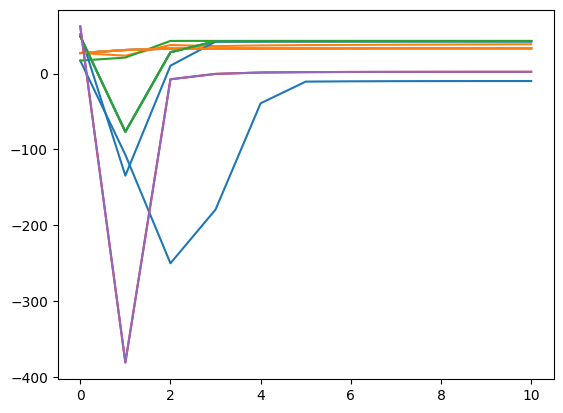

In [28]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=20,MAX_ITER_LR=10)

k	COLOR
0 	 b
1 	 r
2 	 g


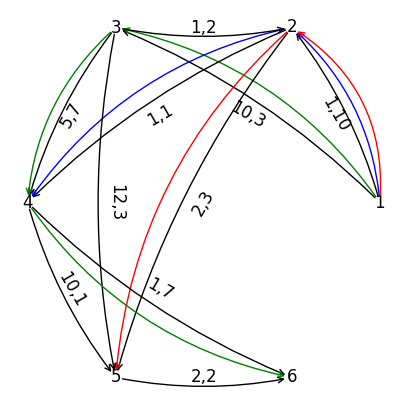

In [29]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=12,figure_size=(5,5))


39 7.275957614183426e-12
42.99999989999361 56.0 [[ 0.  3.  0.]
 [ 1.  0.  2.]
 [ 0. -0. -0.]
 [-0.  3.  0.]
 [-0. -0. -0.]
 [ 1. -0.  2.]
 [-0.  0. -0.]
 [-0.  0. -0.]
 [ 0.  0.  2.]
 [-0. -0. -0.]]


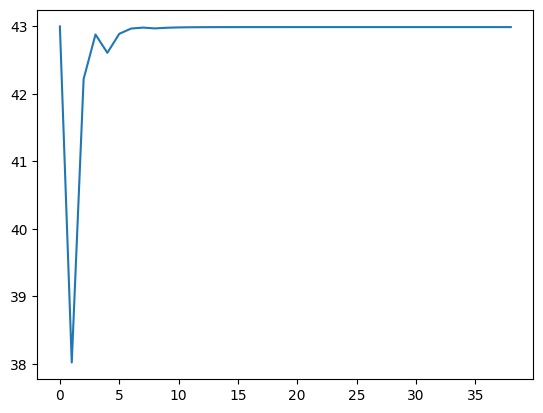

In [67]:
importlib.reload(hf)

LB, UB, X_best = hf.run2(obj,constraints,vp,MAX_ITER=1000)
print(LB,UB,X_best)

k	COLOR
0 	 b
1 	 r
2 	 g


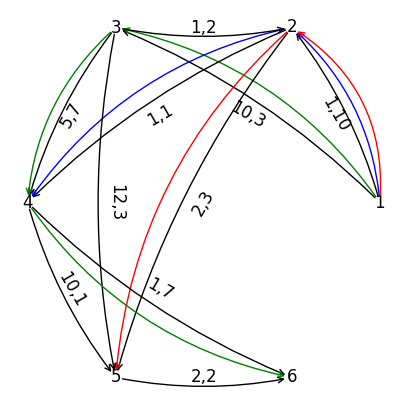

In [46]:
hf.plot_solution_graph(graph,X_best,with_labels=True,font_size=12,figure_size=(5,5))


In [19]:
for i, e in enumerate(graph.edges()):
    print(i,":",e,graph.get_edge_data(e[0],e[1]))

0 : (1, 2) {'c': 1, 'cap': 10}
1 : (1, 3) {'c': 10, 'cap': 3}
2 : (2, 4) {'c': 1, 'cap': 1}
3 : (2, 5) {'c': 2, 'cap': 3}
4 : (3, 2) {'c': 1, 'cap': 2}
5 : (3, 4) {'c': 5, 'cap': 7}
6 : (3, 5) {'c': 12, 'cap': 3}
7 : (4, 5) {'c': 10, 'cap': 1}
8 : (4, 6) {'c': 1, 'cap': 7}
9 : (5, 6) {'c': 2, 'cap': 2}
